# Point Cloud processing


## Install Open 3d

In [ ]:
#!pip install open3d

## Import library

In [1]:
import numpy as np
import open3d as o3d
import copy
import matplotlib.pyplot as plt
import math

## Read Point Cloud

In [2]:
#pcd = o3d.io.read_point_cloud("odm.txt", format='xyzrgb')
pcd = o3d.io.read_point_cloud("/Users/stevenmartine/Desktop/Estuario 2020-21/ODM2/odm2.txt", format='xyzrgb')
print(pcd)

PointCloud with 21731161 points.


In [3]:
print("Print vectors of the first 10 points")
print(np.asarray(pcd.points[:100]))

Print vectors of the first 10 points
[[ 5.46936050e+05  5.71012153e+06 -4.42900009e+01]
 [ 5.46940090e+05  5.71012151e+06 -4.38899994e+01]
 [ 5.46941350e+05  5.71012150e+06 -4.41800003e+01]
 [ 5.46935820e+05  5.71012153e+06 -4.42900009e+01]
 [ 5.46948090e+05  5.71012146e+06 -4.59900017e+01]
 [ 5.46932460e+05  5.71012155e+06 -4.39399986e+01]
 [ 5.46942100e+05  5.71012149e+06 -4.41800003e+01]
 [ 5.46937950e+05  5.71012152e+06 -4.42999992e+01]
 [ 5.46946380e+05  5.71012147e+06 -4.58300018e+01]
 [ 5.46944540e+05  5.71012148e+06 -4.57200012e+01]
 [ 5.46943120e+05  5.71012149e+06 -4.55499992e+01]
 [ 5.46940870e+05  5.71012150e+06 -4.40800018e+01]
 [ 5.46944700e+05  5.71012148e+06 -4.57299995e+01]
 [ 5.46937180e+05  5.71012152e+06 -4.42200012e+01]
 [ 5.46946140e+05  5.71012147e+06 -4.58199997e+01]
 [ 5.46942000e+05  5.71012150e+06 -4.41500015e+01]
 [ 5.46945580e+05  5.71012147e+06 -4.57799988e+01]
 [ 5.46944140e+05  5.71012148e+06 -4.57000008e+01]
 [ 5.46940620e+05  5.71012150e+06 -4.40400009

In [ ]:
print("Print shape array")
print(np.asarray(pcd.points[:]).shape)

In [ ]:
print("Print RGB vectors of the first 10 points")
print(np.asarray(pcd.colors[:10]))

## Estimate Normals

In [ ]:
print("Compute the normal of the point cloud")
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=10, max_nn=10))
print(pcd.normals[0])

In [ ]:
print("Print the normal vectors of the first 10 points")
print(np.asarray(pcd.normals)[:10])

## Visualize using o3d.visualization.draw_geometries()
<code>o3d.visualization.draw_geometries()</code> is work fine outside Jupyter.  
But, it does not work inside Jupyter and Goolge Colab. 
Press key N to see the normal vector in the image.



In [154]:
# Add Bounding volume
aabb = pcd.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
o3d.visualization.draw_geometries([pcd, aabb], window_name = 'Estuario')

## Adjust zero point clouds

In [4]:
#Returns an axis-aligned bounding box of the geometry.
pcd.get_axis_aligned_bounding_box()

AxisAlignedBoundingBox: min: (546900, 5.71008e+06, -57.1), max: (547264, 5.71022e+06, -42.11)

In [156]:
# Returns an oriented bounding box of the geometry.
pcd.get_oriented_bounding_box()

OrientedBoundingBox: center: (547083, 5.71014e+06, -49.2129), extent: 363.096, 133.92314.1338)

In [ ]:
#Returns max bounds for geometry coordinates.
pcd.get_max_bound()

In [ ]:
#Returns min bounds for geometry coordinates.
pcd.get_min_bound()

In [5]:
# Get points to reference zero
def set_zero(pcd):
    pcd2 = copy.copy(pcd) # Copy pcd
    min_x, min_y, min_z = pcd2.get_min_bound()   # Obtain min bound for coordinate. They will be subtracted to each axis
    n_points= len(np.asarray(pcd2.points[:]))
    for a in range(n_points):
        pcd2.points[a][0] = pcd2.points[a][0] - min_x
        pcd2.points[a][1] = pcd2.points[a][1] - min_y
        pcd2.points[a][2] = pcd2.points[a][2] - min_z
    return(pcd2)

In [6]:
#Axis-aligned to zero bounding box of the geometry.
pcd2 = set_zero(pcd)
pcd2.get_axis_aligned_bounding_box()

AxisAlignedBoundingBox: min: (0, 0, 0), max: (363.67, 137.82, 14.99)

In [45]:
# Get points to reference zero (vectorial)
def set_zero2(pcd):
    pcd2 = copy.copy(pcd) # Copy pcd
    min_x, min_y, min_z = pcd2.get_min_bound()   # Obtain min bound for coordinate. They will be subtracted to each axis
    pcd_array = np.asarray(pcd2.points[:])
    pcd_array[:,0] = pcd_array[:,0]-min_x
    pcd_array[:,1] = pcd_array[:,1]-min_y
    pcd_array[:,2] = pcd_array[:,2]-min_z
    return(pcd_array)

In [46]:
pcd_x = set_zero2(pcd)

In [ ]:
# View ponit clouds aligned to zero
aabb = pcd2.get_axis_aligned_bounding_box()
aabb.color = (0, 1, 0)
o3d.visualization.draw_geometries([pcd2, aabb], window_name = 'zero')

In [53]:
def sorted(pcd,axis): # axis x=0, y=1, z=2
    pcd2 = copy.copy(pcd) # Copy pcd
    pcd_sort = np.asarray(pcd2.points[:])
    pcd_sort = pcd_sort[np.argsort(pcd_sort[:,axis])]
    return (pcd_sort) # axis ordered array

In [54]:
pcd_s = sorted(pcd2,axis=1)
pcd_s[:10]

array([[2.56880010e+02, 0.00000000e+00, 8.09000015e+00],
       [2.55890010e+02, 0.00000000e+00, 8.19999694e+00],
       [2.55820010e+02, 0.00000000e+00, 8.19999694e+00],
       [2.56820010e+02, 9.99450032e-03, 8.09999847e+00],
       [2.56810010e+02, 9.99450032e-03, 8.03999710e+00],
       [2.56060010e+02, 1.99966403e-02, 8.19999694e+00],
       [2.56660009e+02, 1.99966403e-02, 8.05999755e+00],
       [2.56790009e+02, 5.99975502e-02, 8.01999664e+00],
       [2.55700009e+02, 5.99975502e-02, 8.20999908e+00],
       [2.55760010e+02, 5.99975502e-02, 8.19999694e+00]])

In [63]:
def index(array): #Input parameter is an array
    n_points = len(array)
    i = (np.arange((n_points))+1).reshape(-1,1) # i = index indicator - sorted array 
    array = np.append(array, i, axis=1) # add index to array
    return(array) #Return same Array more index

In [24]:
pcd_sorted = sorted(pcd,axis=1) # Sorted point clouds min to max in axes 'Y'
pcd_sorted = index(pcd_sorted)
pcd_sorted[0][:] # Sorted point clouds min to max in axes 'Y' plus index --> (X Y Z index)

array([ 5.47284650e+05,  5.70998503e+06, -4.31899986e+01,  0.00000000e+00])

## Generate Matrix to point clouds

In [64]:
# This function takes as input parameters the PC and the required spatial resolution and returns three parameters. An array with the pcd ordered from lowest to highest with respect to the Y axis plus an identification index. A matrix with the indices of the PC located spatially and a verification matrix that when plotted, the PC can be seen in a 2D plane. The returned PC has been referenced to zero.

def pc_matrix(pcd, resolution):
    pcd2 = set_zero(pcd) # set zero point clouds
    max_x, max_y, max_z = pcd2.get_max_bound() # get max values from the point cloud 
    pcd_sorted = sorted(pcd2,axis=1) # Sorted point clouds min to max in axes 'Y'
    pcd_sorted = index(pcd_sorted)# Add index to array --> (X Y Z index)
    m_pcd = np.zeros((int(max_y/resolution+1),int(max_x/resolution+2))) #Get matrix zeros. Parameters: resolution and max value PC 
    m_pcd_image = copy.copy(m_pcd) # Copy matrix for the image matrix
    axis_y, axis_x = m_pcd.shape
    cont = 0 #Control index from array point clouds
    for a in range(axis_y):
        for b in range(axis_x):
        #Search PC in order of pcd_sorted and resolution por each matrix cell. And assigned the position of pc sorted corresponding
            if (pcd_sorted[cont,0] <= b*resolution and pcd_sorted[cont,1] <= a*resolution): #
                value_x = int(pcd_sorted[cont,:][0]/resolution)
                m_pcd[a,value_x] = pcd_sorted[cont,:][3] #It Assigned the position of pc sorted corresponding to matrix
                m_pcd_image[a,value_x] = 1 # It Assigned 1 in position corresponding to image matrix
                cont+=1
    m_pcd = m_pcd[::-1] # Invert Matrix
    m_pcd_image = m_pcd_image[::-1] #Invert Matrix

    return(pcd_sorted, m_pcd, m_pcd_image)

In [65]:
pcd_sorted, m_pcd, m_pcd_image = pc_matrix(pcd,resolution=0.1)

In [67]:
print('Point Clouds number included to Matrix: ' + str(np.count_nonzero(m_pcd_image == 1)))

Point Clouds number included to Matrix: 484636


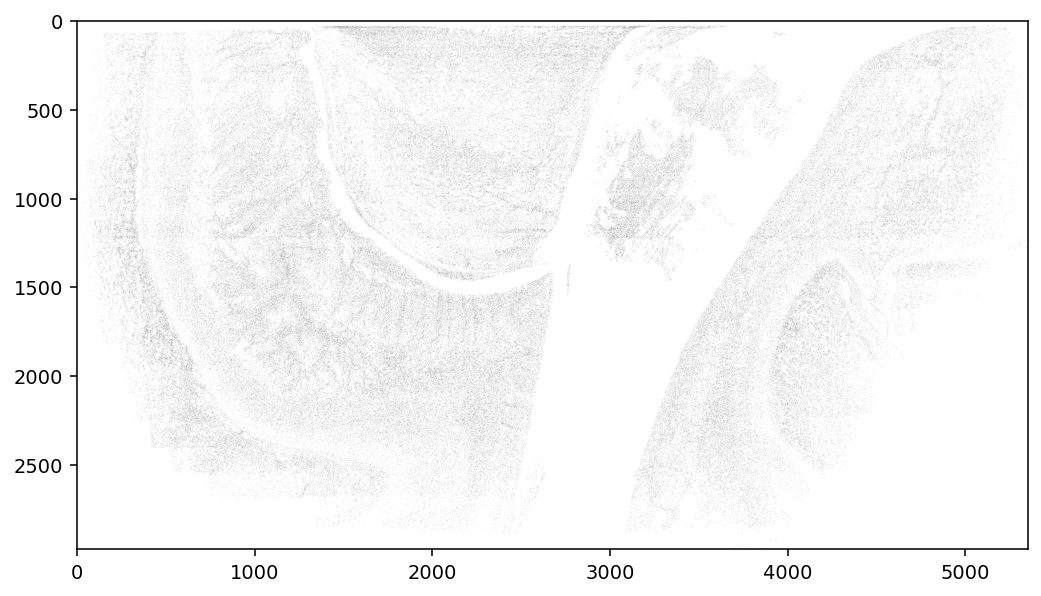

In [75]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 140)
plt.imshow(m_pcd_image, cmap='binary')
plt.show()

In [141]:
def compress(m_pcd, n): #n=  compress factor Ej: 2,3,4,5... --> m_pcd to 1/2, 1/3, 1/4,.....
    axis_y, axis_x = m_pcd.shape
    m_pcd2 = np.zeros((int(axis_y/n),int(axis_x/n)))
    m_pcd2_image = copy.copy(m_pcd2) 
    y, x = m_pcd2.shape

    for a in range(0, y):
        for b in range(0, x):
            valor = m_pcd[n*a:n*a+1, n*b:n*b+1].max()
            m_pcd2[a,b] = valor
            if (valor > 0):
                m_pcd2_image[a,b]= 1
    return(m_pcd2, m_pcd2_image)


In [152]:
m, mi = compress(m_pcd,2)
print('Point Clouds number included to Matrix: ' + str(np.count_nonzero(mi == 1)))

Point Clouds number included to Matrix: 121885


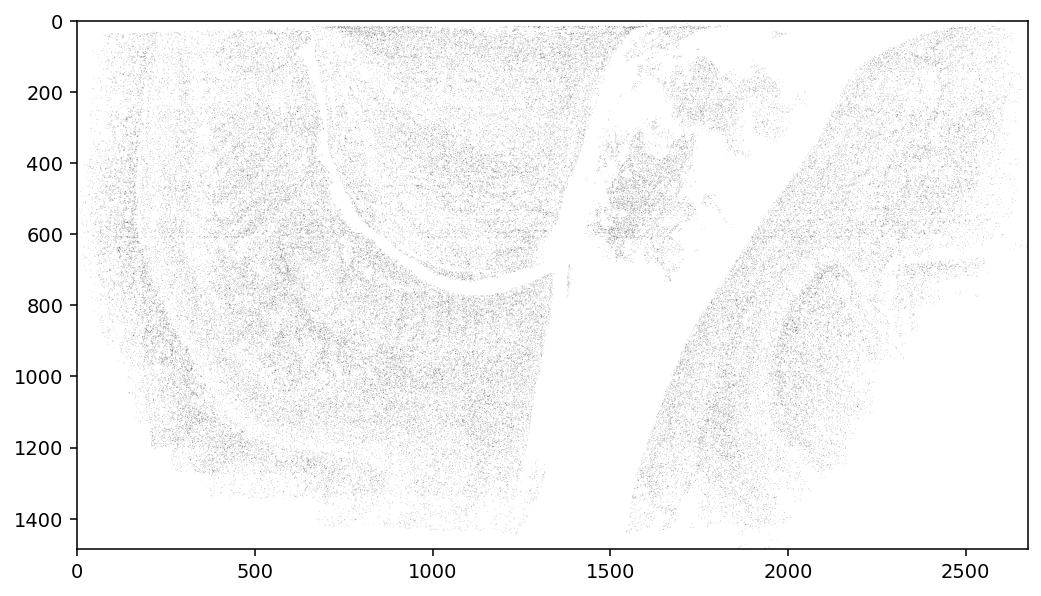

In [143]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 140)
plt.imshow(mi, cmap='binary')
plt.show()

## Slope Point clouds

In [101]:
pcd_sorted[652016,0]

520.2399902300676

In [132]:
def angle(m, pcd_sorted, k):
    axis_y, axis_x = m.shape
    mx = np.zeros((axis_y, axis_x))
    my = copy.copy(mx)
    out = copy.copy(mx)

    for a in range(axis_y):
        for b in range(axis_x):
            if (m[a,b] != 0):
                mx[a,b] = pcd_sorted[int(m[a,b]),0]
                my[a,b] = pcd_sorted[int(m[a,b]),1]

    for a in range(1,axis_y):
        for b in range(1, axis_x):

            if (mx[a,b] != 0 or my[a,b] != 0):
                sub_mx = mx[a-1:a+2, b-1:b+2]
                sub_my = my[a-1:a+2, b-1:b+2]

                if (np.count_nonzero(sub_mx != 0) and np.count_nonzero(sub_my != 0) >= 2): 
                    f0 =(k[0,:]* sub_mx[0,:]).sum()
                    f2 =(k[2,:]* sub_mx[2,:]).sum()
                    c0 =(k[:,0]* sub_my[:,0]).sum()
                    c2 =(k[:,2]* sub_my[:,2]).sum()
                    dx= f0-f2
                    dy= c0-c2
                    out[a,b] = math.atan(math.sqrt(dx**2 + dy**2))*(180/math.pi)

    return(out)

In [147]:
k = np.array(([1,2,1], [2,0,2], [1,2,1]))/8
k2 = np.array(([0,1,0], [1,0,1], [0,1,0]))

m_pcd_angle = angle(m, pcd_sorted,k2)

In [148]:
np.count_nonzero(m_pcd_angle != 0) 

26428

In [40]:
v_min = np.min(m_pcd_angle)
v_max = np.max(m_pcd_angle)
m = 1/(v_max - v_min)
b = -m * v_min
out = (m * m_pcd_angle + b)

In [33]:
out.min()

0.0

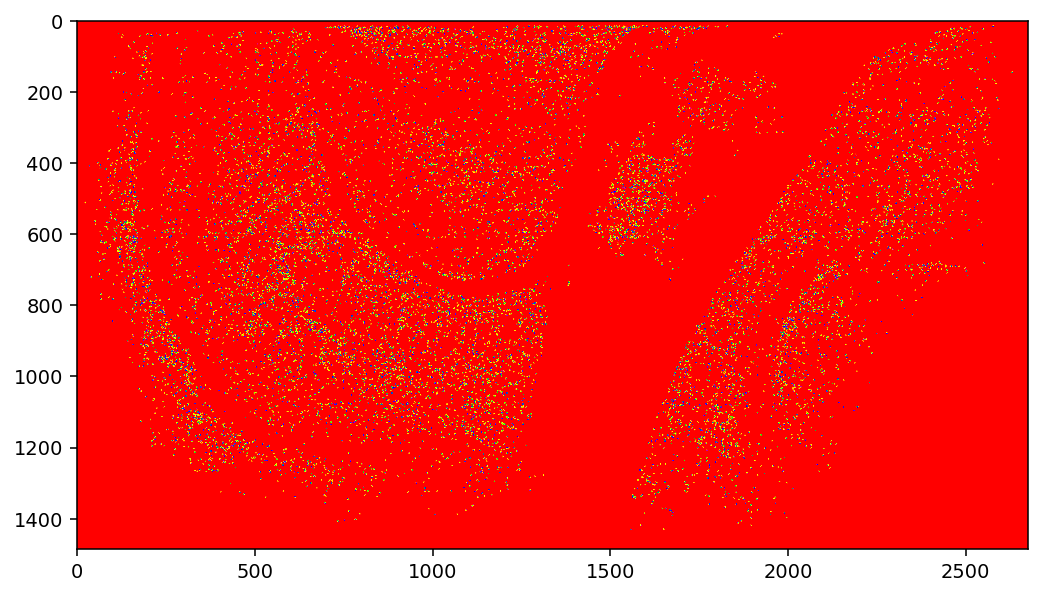

In [149]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 140)
plt.imshow(m_pcd_angle, cmap='prism')
plt.show()

## Read Orthophoto

In [ ]:
from PIL import Image

In [ ]:
# Open orthophoto
im = Image.open('/Users/stevenmartine/Desktop/ODM-pruebas/odm_orthophoto/odm_orthophoto.tif')
# Image to Array
imarray = np.array(im)
# Shape orthophoto 
imarray.shape 

In [ ]:
# View array
# RGB chanels 0,1,2
# Coordinates 3
imarray[:,:,0]

In [ ]:
import matplotlib.pyplot as plt
fig, ax2 = plt.subplots(figsize=(10,5), dpi= 100)
plt.imshow(imarray)
plt.show()

In [ ]:
Coord = imarray[:,:,3]
Coord[1000,1000]

In [ ]:
pip install geojson

In [ ]:
import geojson
with open('/Users/stevenmartine/Desktop/ODM-pruebas/odm_georeferencing/odm_georeferenced_model.bounds.geojson') as f:
    gj = geojson.load(f)
features = gj['features'][0]
features


In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
states  = gpd.read_file('/Users/stevenmartine/Desktop/ODM-pruebas/odm_georeferencing/odm_georeferenced_model.bounds.geojson')
print(states.head(10))

In [ ]:
contents = open('/Users/stevenmartine/Desktop/ODM-pruebas/odm_georeferencing/odm_georeferenced_model.bounds.geojson').read()
print(contents)

## Downsample point cloud

In [ ]:
print("Downsample the point cloud with a voxel of 2")
downpcd = pcd.voxel_down_sample(voxel_size=2)
o3d.visualization.draw_geometries([downpcd])
print(pcd)
print('Downsample ' + str(downpcd))

In [ ]:
print("Recompute the normal of the downsample point cloud")
downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=100, max_nn=30))
o3d.visualization.draw_geometries([downpcd])

In [ ]:
print("Print a normal vector of the 0th point")
print(downpcd.normals[1])

In [ ]:
print("Print the normal vectors of the first 10 points")
print(np.asarray(downpcd.normals)[:10, :])


In [ ]:
pcd.paint_uniform_color([1, 0, 0])
o3d.visualization.draw_geometries([pcd])

In [ ]:
import copy
import numpy as np
import open3d as o3d

if __name__ == "__main__":

    # generate some neat n times 3 matrix using a variant of sync function
    x = np.linspace(-3, 3, 401)
    mesh_x, mesh_y = np.meshgrid(x, x)
    z = np.sinc((np.power(mesh_x, 2) + np.power(mesh_y, 2)))
    z_norm = (z - z.min()) / (z.max() - z.min())
    xyz = np.zeros((np.size(mesh_x), 3))
    xyz[:, 0] = np.reshape(mesh_x, -1)
    xyz[:, 1] = np.reshape(mesh_y, -1)
    xyz[:, 2] = np.reshape(z_norm, -1)
    print('xyz')
    print(xyz)

    # Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(xyz)
    o3d.io.write_point_cloud("sync.ply", pcd)

    # Load saved point cloud and visualize it
    pcd_load = o3d.io.read_point_cloud("sync.ply")
    o3d.visualization.draw_geometries([pcd_load])

    # convert Open3D.o3d.geometry.PointCloud to numpy array
    xyz_load = np.asarray(pcd_load.points)
    print('xyz_load')
    print(xyz_load)

    # save z_norm as an image (change [0,1] range to [0,255] range with uint8 type)
    img = o3d.geometry.Image((z_norm * 255).astype(np.uint8))
    o3d.io.write_image("sync.png", img)
    o3d.visualization.draw_geometries([img])

In [ ]:
from numpy import diff

x =[1,5]
#y = [3, 4, 6]
dx = diff(x)
#dy = diff(y)
#d = dy/dx
print (dx) 
#array([ 10.,  10.,  10.,   0.,  10.,  10.])